In [6]:
from Bio import SeqIO
from datasketch import MinHash, MinHashLSH

In [8]:
sequences = []
labels = []
for record in SeqIO.parse("/home/monster0811/Desktop/BioCom/Proj/Sequence-Alignment-Analysis/Fasta Data/TP53_refseq_transcript.fasta", "fasta"):
    sequences.append(str(record.seq))
    labels.append(record.id)

In [9]:
len(sequences)

300

In [10]:

def get_kmers(sequence, k):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i+k])
    return kmers

In [19]:
#Now i need pairwise distances between all the sequences in a nice data structure
#I will use MinHash for this
#create an adjacency matrix
adj_matrix = [[0 for i in range(len(sequences))] for j in range(len(sequences))]
#Create a list of MinHash objects
minhashes = []
for i in range(len(sequences)):
    minhash = MinHash(num_perm=128)
    kmers = get_kmers(sequences[i], 5)
    for kmer in kmers:
        minhash.update(kmer.encode('utf8'))
    minhashes.append(minhash)

In [20]:
#Now fill the adjacency matrix
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        jaccard = minhashes[i].jaccard(minhashes[j])
        adj_matrix[i][j] = jaccard
        adj_matrix[j][i] = jaccard

/tmp/ipykernel_2149888/2942497656.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_matrix, 'ward')


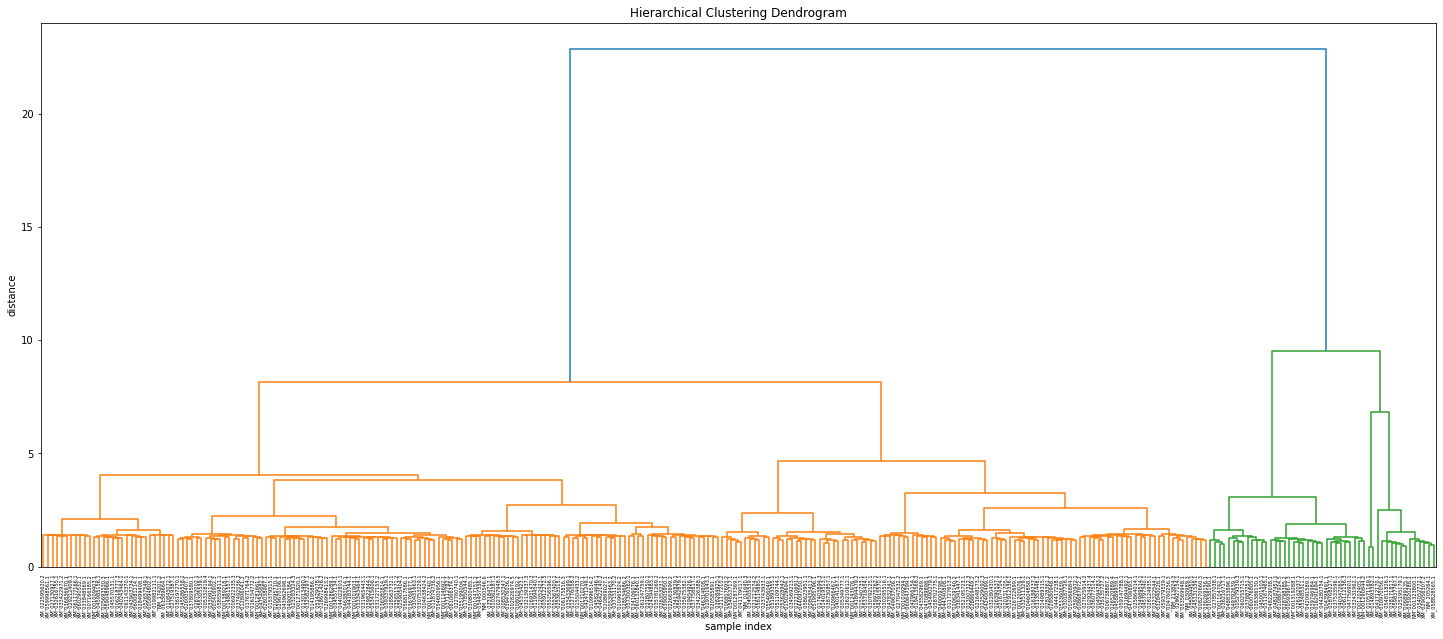

In [31]:
#Now how do I cluster these sequences using the jaccard similarity as the distance metric?
#I will use a MinHashLSH object
#Can i use k-means clustering?
#I will use hierarchical clustering
#I will use the linkage function from scipy
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

Z = linkage(adj_matrix, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels, leaf_rotation=90)
plt.show()


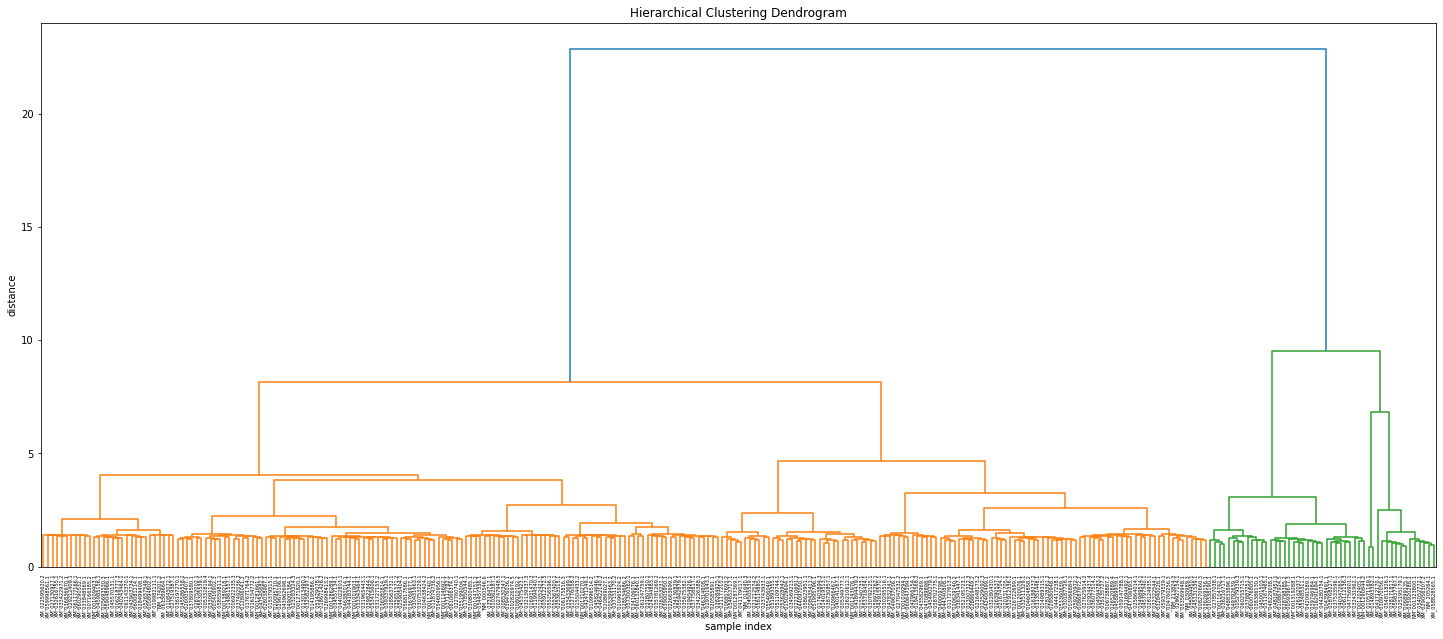

In [53]:
distances_adj = 1 - np.array(adj_matrix)
Z = linkage(distances_adj, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels, leaf_rotation=90)
plt.show()

In [55]:
num_clusters = 2
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, num_clusters, criterion='maxclust')
for i in range(len(clusters)):
    print(labels[i], clusters[i])


NM_000546.6 1
NM_011640.3 1
NM_030989.3 1
NM_001271820.1 1
NM_174201.2 1
NM_205264.1 2
NM_213824.3 1
NM_001389218.1 1
NM_001001903.1 1
NM_001009403.1 1
XM_016931470.3 1
NM_001009294.1 1
XM_056817586.1 1
NM_001047151.2 1
XM_008270660.3 1
NM_001104742.1 2
NM_001202405.1 2
XM_029056307.2 2
NM_001124692.1 1
NM_001200076.1 1
NM_001172740.1 1
XM_002747948.5 1
XM_002826974.5 1
XM_002924437.4 1
XM_030800485.1 1
XM_003416902.3 1
NM_001243976.1 1
XM_025905404.1 1
XM_031965443.1 1
XM_012806041.2 1
XM_057300362.1 1
XM_003912272.5 1
XM_039476036.1 1
XM_003966884.3 1
XM_055367400.1 1
XM_033422971.2 1
XM_033848569.1 1
XM_004398491.1 2
XM_012529092.3 1
XM_004594783.2 1
XM_004604858.2 1
XM_004638424.2 1
XM_045131539.1 1
XM_013007322.3 1
XM_004760256.3 1
NM_001310270.1 1
NM_001281661.1 1
XM_005279339.3 2
XM_005332819.4 1
XM_005349777.1 1
XM_005399463.2 1
XM_045375423.1 1
XM_005693530.3 1
NM_001286289.1 1
XM_005894802.2 1
XM_005939677.3 2
XM_025195179.1 2
NM_001290844.2 2
XM_023743933.1 1
XM_006112136.3 

In [56]:
from collections import Counter
cluster_counts = Counter(clusters)

In [57]:
print(cluster_counts)

Counter({1: 251, 2: 49})
